# Data preparation
WorkShop for Pytorch

1. Prepare and collect data
2. Build Model -- Loss function, optimizer
3. Train Model
4. Test Model
5. Save Model
6. Putting it all together


In [49]:
# modules needed for us
import torch
from torch import nn # neural network
import matplotlib.pyplot as plt

Machine learning is a game of two parts
1. Convert any data, videos, text, images to numeric form
2. Model should find patterns from the numeric data presented

# Linear Regression
** 1 Data Collection and Precession** 

In [50]:
weights = 0.7 # scalar
bias = 0.3 # scalar

X = torch.arange(0, 1, step=0.02).unsqueeze(dim=1)

In [51]:
X.shape
y = weights * X + bias

In [52]:
X[:5], y[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [53]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [54]:
def plot_regression(X_train, y_train, X_test, y_test, prediction=None):
    # plt.figure(figsize=(10, 7))
    plt.scatter(X_train, y_train, color='blue', label='train', s=4)
    plt.scatter(X_test, y_test, color='green', label ='test', s=4)
    if (prediction):
        plt.scatter(prediction[0],prediction[1], c='red', label='predict', s=4)
    plt.legend()
    plt.show()
    

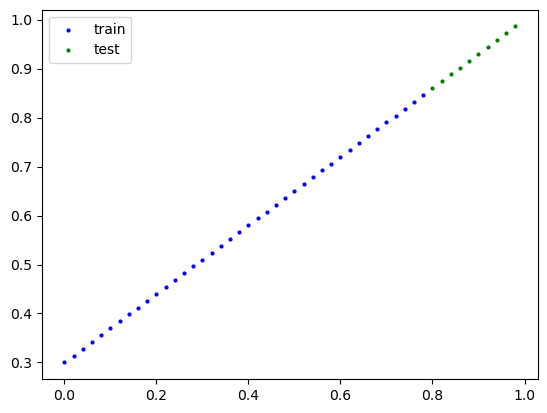

In [55]:
plot_regression(X_train, y_train, X_test, y_test)

**2. Model Building or Picking a Model**

In [56]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.w = nn.Parameter(torch.randn([1], dtype=torch.float32, requires_grad=True))
        self.bias = nn.Parameter(torch.randn([1], dtype=torch.float32, requires_grad=True))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
       return self.w * x + self.bias

In [58]:
torch.manual_seed(42)

model_0 = LinearRegression()
print('list parameters', list(model_0.parameters()))
print('State Dict of  parameters', model_0.state_dict())



list parameters [Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
State Dict of  parameters OrderedDict([('w', tensor([0.3367])), ('bias', tensor([0.1288]))])


### Make Predictions


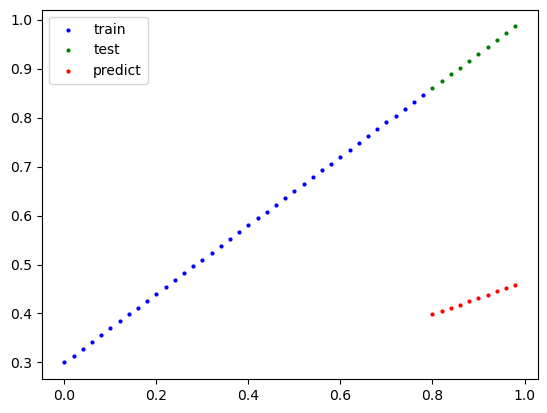

In [62]:
with torch.inference_mode(): # use torch.no_grad() in  older torch version
    y_pred = model_0(X_test)
plot_regression(X_train, y_train, X_test, y_test, [X_test, y_pred])

## Train
For training we need two functions
1. Loss
2. Optimizer
* Loss is used for calculating the losses between actual and predicted value, it can be found in torch.nn
ex: torch.nn.L1loss, torch.nn.crossentropyloss
* Optimizer is used for updating the parameters based on loss, it can be found in nn.optim ex; nn.optim.SGD, optim.Adam
it takes parameters of models and learning rate, it can be 0.01, 0.001 etc, since this parameters can be tweeked by the User it's known as Hyperparameters

## Training Song

1. Forward Pass y= xm+c
2. calculate the loss , loss = |y_pred - y_actual|
3. Optimizer zero grad, it resets the grad values to zero, optimizer.zero_grad()
4. loss.back(), initialize back propagation
5. optimizer.step, update the new values in parameters


In [138]:
loss = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

def train(X, y, model, loss, optimizer):
    # forward pass
    y_pred = model(X)
    # loss
    loss_ = loss(y_pred, y)
    # zero_grad
    optimizer.zero_grad()
    # backpropagation
    loss_.backward()

    print(loss_)
    # step gradient
    optimizer.step()
    
    # eval
    
    # model.eval()
    # with torch.inference_mode():
    #     y_pred_test

def inference(model, X, y, loss, device='cpu'):
    with torch.inference_mode():
        y_pred = model(X.to(device))
        loss_ = loss(y_pred, y.to(device))
        print(loss_)
    return X, y_pred.detach.numpy()


    

In [139]:

epochs = 100
for epoch in range(epochs):
    train(X_train, y_train, model_0, loss=loss, optimizer=optimizer)


tensor(0.0089, grad_fn=<MeanBackward0>)
tensor(0.0026, grad_fn=<MeanBackward0>)
tensor(0.0089, grad_fn=<MeanBackward0>)
tensor(0.0026, grad_fn=<MeanBackward0>)
tensor(0.0089, grad_fn=<MeanBackward0>)
tensor(0.0026, grad_fn=<MeanBackward0>)
tensor(0.0089, grad_fn=<MeanBackward0>)
tensor(0.0026, grad_fn=<MeanBackward0>)
tensor(0.0089, grad_fn=<MeanBackward0>)
tensor(0.0026, grad_fn=<MeanBackward0>)
tensor(0.0089, grad_fn=<MeanBackward0>)
tensor(0.0026, grad_fn=<MeanBackward0>)
tensor(0.0089, grad_fn=<MeanBackward0>)
tensor(0.0026, grad_fn=<MeanBackward0>)
tensor(0.0089, grad_fn=<MeanBackward0>)
tensor(0.0026, grad_fn=<MeanBackward0>)
tensor(0.0089, grad_fn=<MeanBackward0>)
tensor(0.0026, grad_fn=<MeanBackward0>)
tensor(0.0089, grad_fn=<MeanBackward0>)
tensor(0.0026, grad_fn=<MeanBackward0>)
tensor(0.0089, grad_fn=<MeanBackward0>)
tensor(0.0026, grad_fn=<MeanBackward0>)
tensor(0.0089, grad_fn=<MeanBackward0>)
tensor(0.0026, grad_fn=<MeanBackward0>)
tensor(0.0089, grad_fn=<MeanBackward0>)


In [100]:
model_0.state_dict()

OrderedDict([('w', tensor([0.6990])), ('bias', tensor([0.3093]))])

tensor(0.0084)


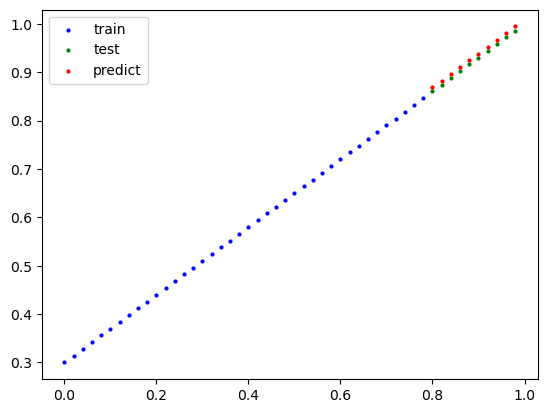

In [102]:
y_list = inference(model_0, X=X_test, y=y_test, loss=loss)
plot_regression(X_train, y_train, X_test, y_test, y_list)

## Saving and loading the model

In [103]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

In [104]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: models/01_pytorch_workflow_model_0.pth


In [105]:
model_2 = torch.load('models/01_pytorch_workflow_model_0.pth')

In [111]:
model_loaded = LinearRegression()

In [112]:
model_loaded.load_state_dict(model_2)


<All keys matched successfully>

In [113]:
model_loaded.state_dict()

OrderedDict([('w', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [122]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
class LinearRegressionLinear(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features=1, out_features=1, device=device)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear(x)
                                
    

In [123]:
test_model_linear = LinearRegressionLinear()

In [124]:
test_model_linear.state_dict()

OrderedDict([('linear.weight', tensor([[0.6517]], device='cuda:0')),
             ('linear.bias', tensor([0.4592], device='cuda:0'))])

In [146]:
#loss
loss = nn.L1Loss()
optimizer = torch.optim.SGD(params=test_model_linear.parameters(), lr=0.001)

def train_(model, X, y, loss, optimizer, epoch, device):
    # forward
    y_pred = model(X.to(device))
    # loss
    loss_ = loss(y_pred, y.to(device))
    # zero_grad clear values in optimizer
    optimizer.zero_grad()
    # back propagation
    loss_.backward()
    # step update the weights or parameters of the model
    optimizer.step()
    # eval
    # model.eval()
    # with torch.inference_mode():
    if (epoch %100 == 0):
        print(loss_, model.state_dict())
        
        
def inference(model, X, y, loss, device='cpu'):
    with torch.inference_mode():
        y_pred = model(X.to(device))
        loss_ = loss(y_pred, y.to(device))
        print(loss_)
    return X, y_pred.detach().cpu().numpy()



    


In [131]:
epochs = 1000
for epoch in range(epochs):
    train_(test_model_linear, X_train, y_train, loss, optimizer, epoch, device)
test_model_linear.state_dict()

tensor(0.1404, device='cuda:0', grad_fn=<MeanBackward0>) OrderedDict([('linear.weight', tensor([[0.6513]], device='cuda:0')), ('linear.bias', tensor([0.4582], device='cuda:0'))])
tensor(0.0272, device='cuda:0', grad_fn=<MeanBackward0>) OrderedDict([('linear.weight', tensor([[0.6131]], device='cuda:0')), ('linear.bias', tensor([0.3592], device='cuda:0'))])
tensor(0.0159, device='cuda:0', grad_fn=<MeanBackward0>) OrderedDict([('linear.weight', tensor([[0.6213]], device='cuda:0')), ('linear.bias', tensor([0.3338], device='cuda:0'))])
tensor(0.0125, device='cuda:0', grad_fn=<MeanBackward0>) OrderedDict([('linear.weight', tensor([[0.6382]], device='cuda:0')), ('linear.bias', tensor([0.3260], device='cuda:0'))])
tensor(0.0090, device='cuda:0', grad_fn=<MeanBackward0>) OrderedDict([('linear.weight', tensor([[0.6552]], device='cuda:0')), ('linear.bias', tensor([0.3188], device='cuda:0'))])
tensor(0.0056, device='cuda:0', grad_fn=<MeanBackward0>) OrderedDict([('linear.weight', tensor([[0.6723]]

OrderedDict([('linear.weight', tensor([[0.6995]], device='cuda:0')),
             ('linear.bias', tensor([0.3010], device='cuda:0'))])

tensor(0.0005, device='cuda:0')


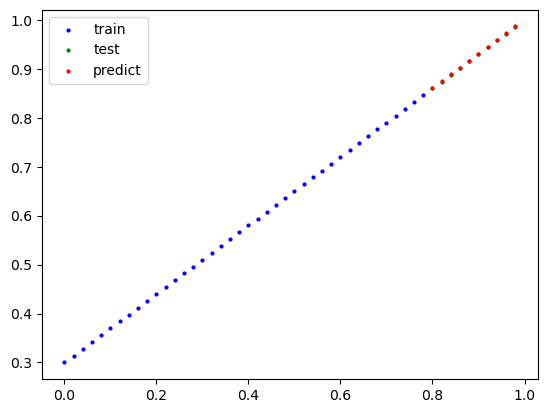

In [147]:
y_linear_li = inference(test_model_linear, X_test, y_test, loss, device)
plot_regression(X_train, y_train, X_test, y_test, y_linear_li)